# Build MTH5 from USGS Geomagnetic data

Its common to look at observatory data for geomagnetic storms or to use as a remote reference.  The USGS provides geomagnetic observatory data for observatories in North America.  In the future this will be expanded to the various other observatories using well developed packages like [geomagpy](https://pypi.org/project/geomagpy/). 

You will need to know ahead of time what observatories you would like to download data from, dates, and type of data.  There are no wildcards.  See [USGS Geomagnetic webservices](https://www.usgs.gov/tools/web-service-geomagnetism-data) for more information on allowed options.

Here we will download 2 days of data from 2 different observatories for the x and y components of calibrated data ('adjusted').

In [1]:
import pandas as pd

from mth5.clients import MakeMTH5

2023-06-22 09:31:41,015 [line 141] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log




## Create a request DataFrame

The request input is in the form of a `pandas.DataFrame` with the following columns

| Column | Description | Options |
|--------|-------------|---------|
| observatory | Observatory code | BDT, BOU, TST, BRW, BRT, BSL, CMO, CMT, DED, DHT, FRD, FRN, GUA, HON, NEW, SHU, SIT, SJG, TUC,  USGS, BLC, BRD, CBB, EUA, FCC, IQA, MEA, OTT, RES, SNK, STJ, VIC, YKC, HAD, HER, KAK|
| type | The type of data to download | variation, adjusted, quasi-definitive, definitivevariation, adjusted (*default*), quasi-definitive, definitive |
| elements | Components or elements of the geomagnetic data to download, should be a list| D, DIST, DST, E, E-E, E-N, F, G, H, SQ, SV, UK1, UK2, UK3, UK4, X, Y, ZD, DIST, DST, E, E-E, E-N, F, G, H, SQ, SV, UK1, UK2, UK3, UK4, X, Y, Z |
| sampling_period | Sampling period of data to download in seconds | 1, 60, 3600 |
| start | Start time (YYYY-MM-DDThh:mm:ss)  in UTC time| |
| end | End time (YYYY-MM-DDThh:mm:ss) in UTC time||

In [2]:
request_df = pd.DataFrame(
    {
        "observatory": ["frn"],
        "type": ["adjusted"],
        "elements": [["x", "y"]],
        "sampling_period": [1],
        "start": [
            "2017-06-20T00:00:00",
        ],
        "end": [
            "2017-07-02T00:00:00",
        ],
    }
)

In [3]:
request_df

,observatory,type,elements,sampling_period,start,end
0,frn,adjusted,"[x, y]",1,2017-06-20T00:00:00,2017-07-02T00:00:00


### Adding Run ID

When the request is input automatically run names will be assigned to different windows of time by `f"sp{sampling_period}_{count:03}"`. So the first run is `sp1_001`, alternatively you can add a run column and name them as you like.  

## Create MTH5

Once the request is complete get the data. The file name will be created automatically as `usgs_geomag_{list of observatories}_{list of elements}.h5`

In [4]:
make_mth5_object = MakeMTH5(
    mth5_version="0.2.0",
    interact=True,
    save_path=r"c:\Users\jpeacock\OneDrive - DOI\MTData\Gesyers",
)
mth5_object = make_mth5_object.from_usgs_geomag(request_df)

2023-06-22 09:32:22,995 [line 673] mth5.mth5.MTH5._initialize_file - INFO: Initialized MTH5 0.2.0 file c:\Users\jpeacock\OneDrive - DOI\MTData\Gesyers in mode a
2023-06-22 09:32:51,596 [line 658] mth5.timeseries.run_ts.RunTS.validate_metadata - WARNING: end time of dataset 2017-07-02T00:00:05+00:00 does not match metadata end 2017-07-02T00:00:00+00:00 updating metatdata value to 2017-07-02T00:00:05+00:00


### Check to make sure everything was downloaded properly

In [5]:
mth5_object.channel_summary.summarize()
mth5_object.channel_summary.to_dataframe()

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,USGS-GEOMAG,Fresno,sp1_001,37.091,-119.718,331.0,hx,2017-06-20 00:00:00+00:00,2017-07-02 00:00:05+00:00,1036806,1.0,magnetic,0.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,USGS-GEOMAG,Fresno,sp1_001,37.091,-119.718,331.0,hy,2017-06-20 00:00:00+00:00,2017-07-02 00:00:05+00:00,1036806,1.0,magnetic,90.0,0.0,nanotesla,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


### Have a look at a run

In [6]:
run = mth5_object.get_run("Fresno", "sp1_001", "USGS-GEOMAG")

In [10]:
hx = run.get_channel("hx")


In [13]:
hx.hdf5_dataset[0:100]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

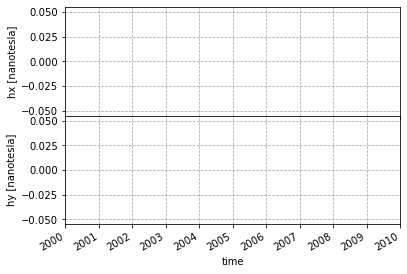

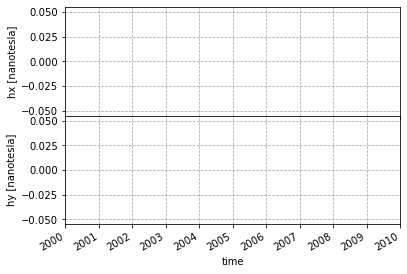

In [7]:
run_ts = run.to_runts()
run_ts.plot()

## Close the MTH5 file

**IMPORTANT**: Be sure to close the file, otherwise bad things can happen.

In [14]:
mth5_object.close_mth5()

2023-06-22 09:38:12,937 [line 754] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing c:\Users\jpeacock\OneDrive - DOI\MTData\Gesyers
